In [190]:
import numpy as np
import time
import matplotlib.pyplot as plt

with open("../data/day20.txt", "r") as f:
    input = f.read()

data = input.split("\n\n")
algorithm = data[0].replace('#', '1').replace('.', '0')
print(algorithm)

with open("../data/day20.txt", "r") as f:
    D = np.genfromtxt(f, skip_header=1, dtype='str', comments='q', delimiter=1, usemask=True, missing_values='#') # converters only apply to column

M = D.mask.astype('int') # keep bool?
print(M)

11001010001101111001001110101010101111010110000011111011001001010110000000110110101000100001011110010110110000111001101111101100001101010101000011110001101000000101001100000011001001110100111101110001101011010011011001010100111001101111010101001011000100110001101111100110110010001001110101000100100110001010000000000100010001010101001011100110000111100111111101101000001010111000110001110001011011011001000000101110001010101000110101011010011101000110001100000001111011001010000101111100100111110100000100001010
[[0 1 1 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 0 1 0]
 [0 1 1 ... 1 0 1]]


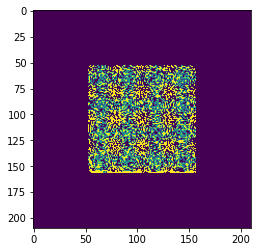

4968

In [192]:
# Puzzle 1 and 2

def enhance(N):
    Z = np.zeros_like(N)
    for i in range(1, N.shape[0]-1): # vertical
        for j in range(1, N.shape[1]-1): # horizontal
            sub = N[i-1:i+2, j-1:j+2]
            binary = "".join(sub.flatten().astype('str'))
            Z[i, j] = algorithm[int(binary, 2)]
    return np.pad(Z[1:-1, 1:-1], 1, mode='edge')

N = np.pad(M, 55, mode='constant', constant_values=0) # Must be padded with enough space
for n in range(2): # 2 or 50 for Puzzle 1 and 2 respectively
    N = enhance(N)

plt.imshow(N)
plt.show()

np.sum(N)